In [1]:
import torch
from torch_geometric.loader import DataLoader
from data.graph_dataset import OneDDatasetBuilder, OneDDatasetLoader, normalize, dataset_to_loader
import matplotlib.pyplot as plt
import os
from model.Geo_DeepOnet import Net1D
# from model.Geo_DeepOnet_v2 import Net1D_v2
from data.utils import LpLoss
from time import time
os.environ["CUDA_VISIBLE_DEVICES"]="1"

Processing...
Done!


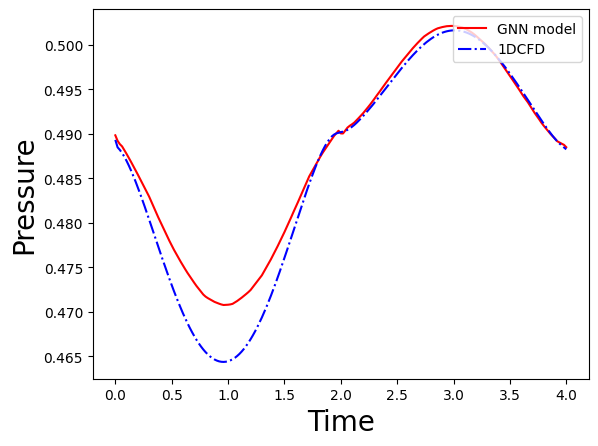

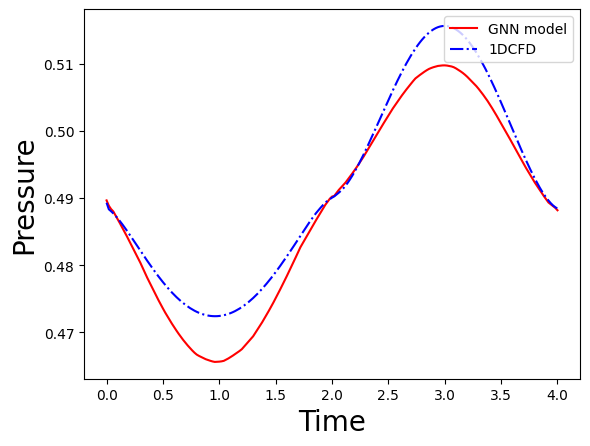

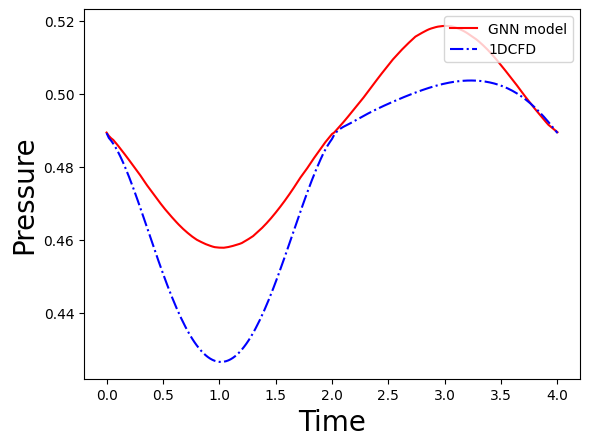

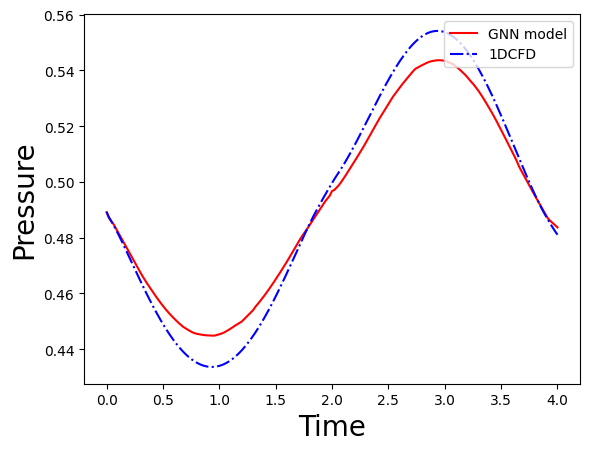

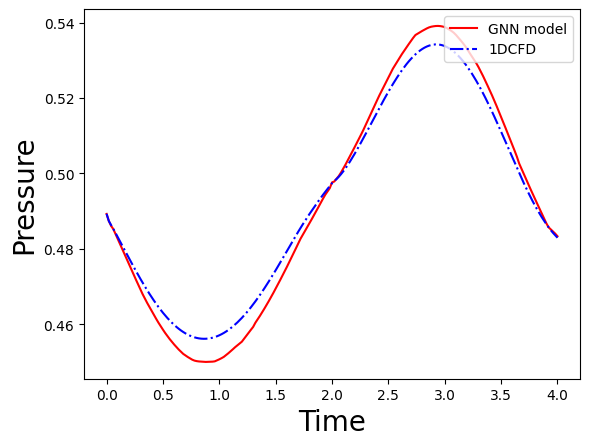

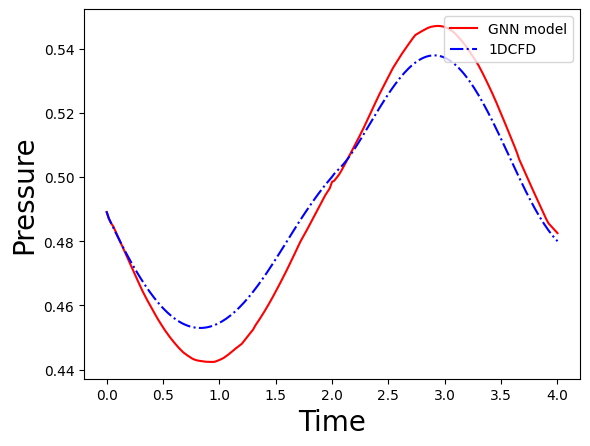

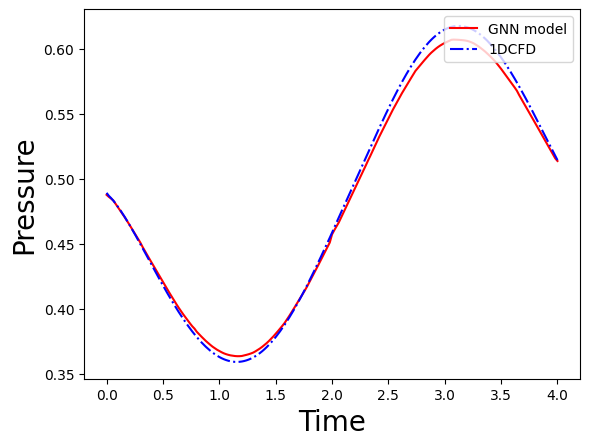

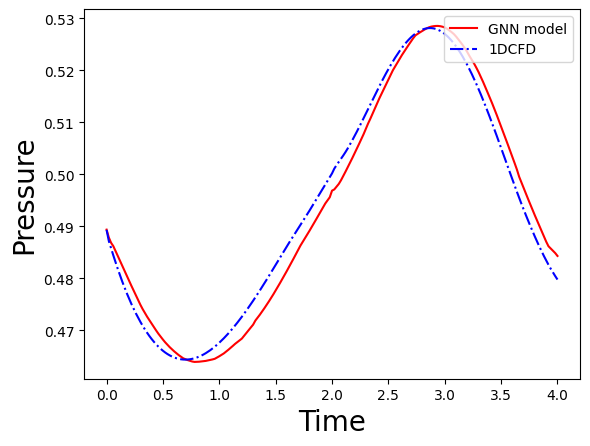

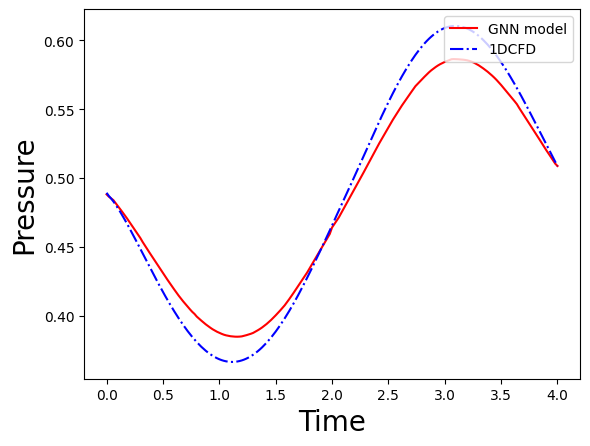

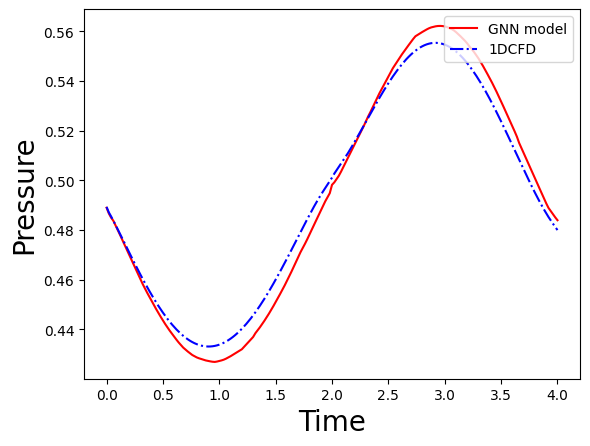

In [43]:
dataset = OneDDatasetLoader(
    root_dir='./pre_data',
    sub_dir='normalized',
    subjects='all',
    time_names=[str(i).zfill(3) for i in range(201)],
    data_type = torch.float32
)

model = Net1D(n_branch=13, width=1000, depth=3, p=512, act=torch.relu).cuda()
model.load_state_dict(torch.load('./module/Geo_DeepOnet_batch/model3000-0.014.pth'))

# model = Net1D_v2(n_branch=13, width=1000, depth=4, p=512, act=torch.relu).cuda()
# model.load_state_dict(torch.load('./module/Geo_DeepOnet_v2/model500-0.022.pth'))
model.eval()

data = dataset[34]
data = data.cuda()

x_trunk = torch.linspace(-1, 1, 201).cuda()
x_trunk = x_trunk[:, None]

out = model(data.node_attr, data.edge_index, x_trunk)


node_list = [17, 50, 100, 1000, 2000, 5000, 20000, 35000, 40000, 50000]
# node_list = [17000, 19000, 20000, 22000, 23000, 25000, 30000]
## Draw pressure
import matplotlib.pyplot as plt
for i_node in node_list:
    y_pred = out.cpu().detach().numpy()[i_node,:]
    y_true = data.pressure.cpu().detach().numpy()[i_node,:]

    # print(y_true.shape, y_pred.shape)
    x = [i * 4.0 /200 for i in range(y_pred.shape[0])]
    # print(data.node_attr.numpy()[i_node, 6])
    # plt.ylim(-1,1)
    plt.plot(x, y_pred, c='red', label='GNN model')
    plt.plot(x, y_true, c='blue', linestyle='dashdot', label='1DCFD')
    # plt.ylim([-1,1])
    plt.legend(loc='upper right')
    plt.ylabel('Pressure', fontsize=20)
    plt.xlabel('Time', fontsize=20)
    plt.show()

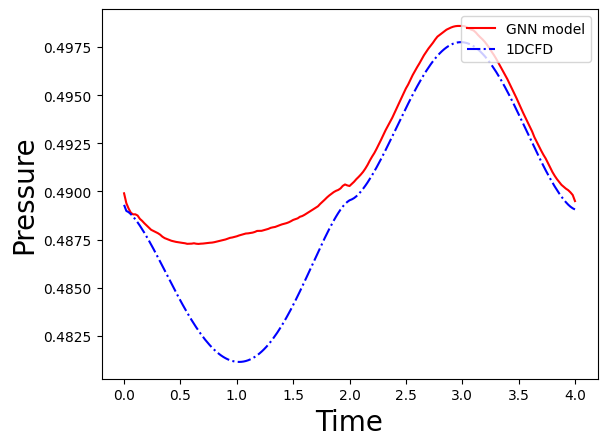

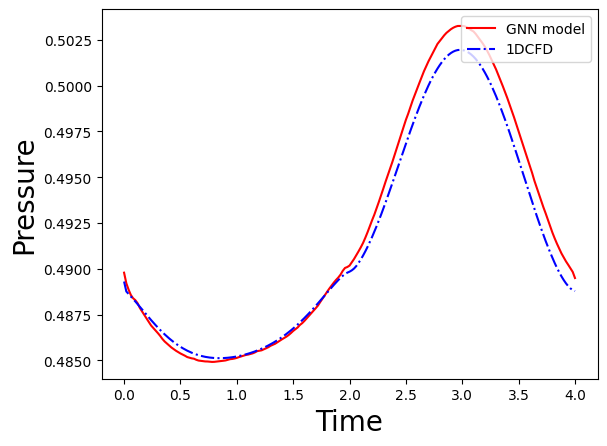

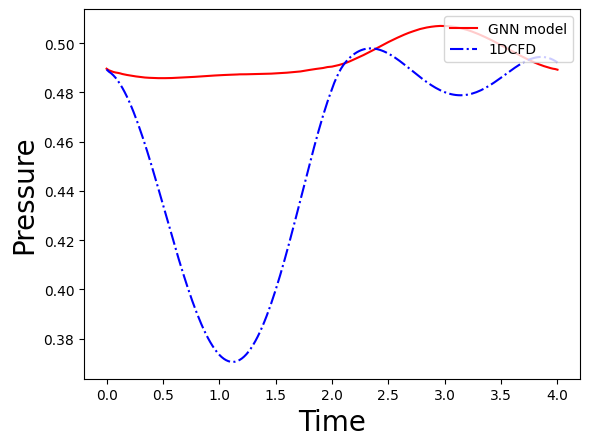

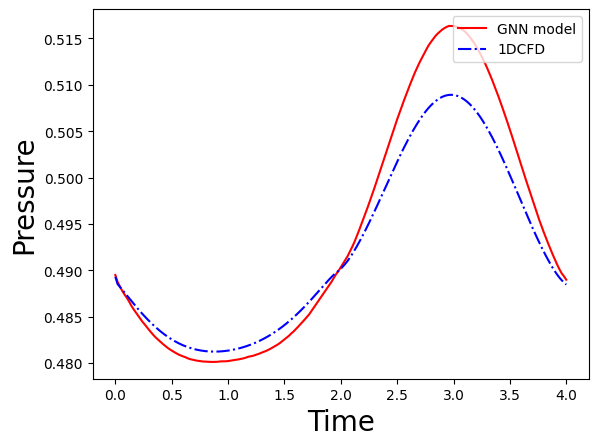

In [7]:
node_list = [17, 50, 100, 1000]#, 2000, 5000, 20000, 35000, 40000, 50000]
## Draw pressure
import matplotlib.pyplot as plt
for i_node in node_list:
    y_pred = out.cpu().detach().numpy()[i_node,:]
    y_true = data.pressure.cpu().detach().numpy()[i_node,:]

    # print(y_true.shape, y_pred.shape)
    x = [i * 4.0 /200 for i in range(y_pred.shape[0])]
    # print(data.node_attr.numpy()[i_node, 6])
    # plt.ylim(-1,1)
    plt.plot(x, y_pred, c='red', label='GNN model')
    plt.plot(x, y_true, c='blue', linestyle='dashdot', label='1DCFD')
    # plt.ylim([-1,1])
    plt.legend(loc='upper right')
    plt.ylabel('Pressure', fontsize=20)
    plt.xlabel('Time', fontsize=20)
    plt.show()